In [30]:
# Import and load

import keras
keras.__version__

from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from keras.callbacks import ModelCheckpoint

import os

from sklearn.metrics import roc_auc_score 

import matplotlib.pyplot as plt 
%matplotlib inline

# output directory name:
output_dir1 = 'model_output/rnn1'
output_dir2 = 'model_output/rnn2'
output_dir3 = 'model_output/rnn3'
output_dir4 = 'model_output/rnn4'

n_unique_words = 10000 
max_review_length = 500

print('Loading data...')
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words) # removed n_words_to_skip
pad_type = trunc_type = 'pre'
x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)

print(len(x_train), 'training sequences')
print(len(x_valid), 'validation sequences')
print('x_train shape:', x_train.shape)
print('x_valid shape:', x_valid.shape)



Loading data...
(25000, 'training sequences')
(25000, 'validation sequences')
('x_train shape:', (25000, 500))
('x_valid shape:', (25000, 500))


In [35]:
# training:
epochs = 5
batch_size = 128

# vector-space embedding: 
n_dim = 32

# RNN layer architecture:
n_rnn = 32 
drop_rnn = 0.2

model1 = Sequential()
model1.add(layers.Embedding(n_unique_words, n_dim))
model1.add(layers.SimpleRNN(n_rnn, dropout=drop_rnn))
model1.add(layers.Dense(1, activation='sigmoid'))

model2 = Sequential()
model2.add(layers.Embedding(n_unique_words, n_dim))
model2.add(layers.SimpleRNN(n_rnn, dropout=drop_rnn, return_sequences=True))
model2.add(layers.SimpleRNN(n_rnn, dropout=drop_rnn))
model2.add(layers.Dense(1, activation='sigmoid'))

model3 = Sequential()
model3.add(layers.Embedding(n_unique_words, n_dim))
model3.add(layers.SimpleRNN(n_rnn, dropout=drop_rnn, return_sequences=True))
model3.add(layers.SimpleRNN(n_rnn, dropout=drop_rnn, return_sequences=True))
model3.add(layers.SimpleRNN(n_rnn, dropout=drop_rnn))
model3.add(layers.Dense(1, activation='sigmoid'))

model4 = Sequential()
model4.add(layers.Embedding(n_unique_words, n_dim))
model4.add(layers.SimpleRNN(n_rnn, dropout=drop_rnn, return_sequences=True))
model4.add(layers.SimpleRNN(n_rnn, dropout=drop_rnn, return_sequences=True))
model4.add(layers.SimpleRNN(n_rnn, dropout=drop_rnn, return_sequences=True))
model4.add(layers.SimpleRNN(n_rnn, dropout=drop_rnn))
model4.add(layers.Dense(1, activation='sigmoid'))

models = [model1, model2, model3, model4]
outdirs = [output_dir1, output_dir2, output_dir3, output_dir4]

In [36]:
def train_model(model, output_dir):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid, y_valid), callbacks=[modelcheckpoint])
    return history

hists = []
for k in range(len(models)):
    hists.append(train_model(models[k], outdirs[k]))
    print('Training model {} complete'.format(k))
    

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 30s 1ms/step - loss: 0.6026 - acc: 0.6583 - val_loss: 0.4255 - val_acc: 0.8130
Epoch 2/5
25000/25000 [==============================] - 29s 1ms/step - loss: 0.4506 - acc: 0.7944 - val_loss: 0.3986 - val_acc: 0.8281
Epoch 3/5
25000/25000 [==============================] - 30s 1ms/step - loss: 0.2995 - acc: 0.8784 - val_loss: 0.3512 - val_acc: 0.8536
Epoch 4/5
25000/25000 [==============================] - 30s 1ms/step - loss: 0.2254 - acc: 0.9143 - val_loss: 0.3801 - val_acc: 0.8593
Epoch 5/5
25000/25000 [==============================] - 30s 1ms/step - loss: 0.1936 - acc: 0.9271 - val_loss: 0.3618 - val_acc: 0.8624
Training model 0 complete
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 55s 2ms/step - loss: 0.6923 - acc: 0.5296 - val_loss: 0.6776 - val_acc: 0.5557
Epoch 2/5
25000/25000 [==============================] - 5

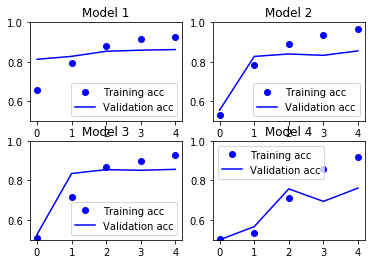

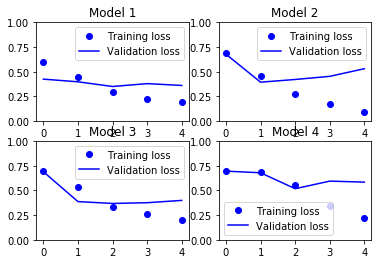

In [37]:
plt.figure(1)
plt.clf()
plt.figure(2)
plt.clf()

for k in range(len(models)):
    
    history = hists[k]

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))
    
    plt.figure(1)
    plt.subplot(2, 2, k+1)
    plt.title('Model {}'.format(k+1))
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.ylim([0.5, 1])
    #plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure(2)
    plt.subplot(2, 2, k+1)
    plt.title('Model {}'.format(k+1))
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    #plt.title('Training and validation loss')
    plt.ylim([0, 1])
    plt.legend()

plt.show()

In [42]:

y_hats = []
points = ['2', '2', '2', '2']
for k in range(len(models)):
    models[k].load_weights(outdirs[k]+"/weights.0"+points[k]+".hdf5") # zero-indexed
    y_hats.append(models[k].predict_proba(x_valid))
    print("Model {}: {:0.2f}".format(k+1, roc_auc_score(y_valid, y_hats[k])*100.0))
    

Model 1: 90.15
Model 2: 91.09
Model 3: 91.20
Model 4: 62.37


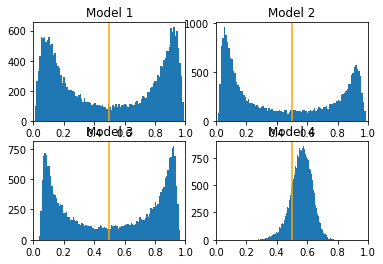

In [46]:
plt.figure(2)
plt.clf()
for k in range(len(models)):
    plt.subplot(2, 2, k+1)
    plt.title('Model {}'.format(k+1))
    plt.hist(y_hats[k], bins=100)
    _ = plt.axvline(x=0.5, color='orange')
    plt.xlim([0, 1])
plt.savefig("RNN_hist.svg")